## Extract Wordcloud

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
from common import connectMongo
from common import getData

In [3]:
conn = connectMongo.connect_mongo('forums','ooakForum')

In [4]:
import re 

patterns = {'Tenergy 05':"[tT]energy[-\s]?05\s?[^Ff]?[^Xx]?",
            'Baracuda':"Baracuda",
           }
regex_or = re.compile(patterns['Tenergy 05'], re.IGNORECASE)
regex_or_result = conn.find({"title":regex_or},{"title":1,"replies.clean_text":1})


## Tenergy 05

In [16]:
regex_or = re.compile(patterns['Tenergy 05'], re.IGNORECASE)
regex_or_result = conn.find({"title":regex_or},{"title":1,"replies.clean_text":1})
tmp = getData.generate_df_from_result(regex_or_result)
df_s = tmp.copy()
df_s['reply_split'] = df_s.reply.apply(getData.tokenize_sent)  # df_s.reply.apply(tokenize_sent)
df_s = df_s.explode('reply_split')
df_s = df_s.drop('reply', axis=1)
df_s = df_s.loc[df_s['reply_split'].notnull(),:]

In [17]:
df_s.reset_index(inplace=True)
searchfor = ['[tT]energy]', '[tT]05']
df1 = df_s[df_s.reply_split.str.contains('|'.join(searchfor))]

## Baracuda 

In [19]:
regex_or = re.compile(patterns['Baracuda'], re.IGNORECASE)
regex_or_result = conn.find({"title":regex_or},{"title":1,"replies.clean_text":1})
tmp = getData.generate_df_from_result(regex_or_result)
df_s = tmp.copy()
df_s['reply_split'] = df_s.reply.apply(getData.tokenize_sent)
df_s = df_s.explode('reply_split')
df_s = df_s.drop('reply', axis=1)
df_s_tmp = df_s.loc[df_s['reply_split'].notnull(),:]
df_s_tmp.reset_index(inplace=True)
searchfor = ['[bB]aracuda']
df2 = df_s_tmp[df_s_tmp.reply_split.str.contains('|'.join(searchfor))]

## Preprocess Data

In [118]:
def remove_dash(list_data):
    
    final_ = []
    for cur_sentence in list_data:
        for cur_word in cur_sentence:
            final_.append(cur_word.replace("'",''))
        
    return final_

In [128]:
from common import cleanData
data_col = 'reply_split'
clean_df1 = cleanData.preprocess_news(df1,data_col,lowercase=True)
clean_df2 = cleanData.preprocess_news(df2,data_col,lowercase=True)

clean_df1 = remove_dash(clean_df1)
clean_df2 = remove_dash(clean_df2)

string_df1 = ' '.join(clean_df1)    
string_df2 = ' '.join(clean_df2)    


In [129]:
len(string_df1)

32471

### CONVERT INTO MODULARIZED CODE

In [130]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np

In [131]:
stop_words =  ["i", "me", "my", "myself", "we", "our", 
               "ours", "ourselves", "you", "your", "yours",
               "yourself", "yourselves", "he", "him", "his", 
               "himself", "she", "her", "hers", "herself", 
               "it", "its", "itself", "they", "them", "their", 
               "theirs", "themselves", "what", "which", "who", 
               "whom", "this", "that", "these", "those", "am", 
               "is", "are", "was", "were", "be", "been", "being", 
               "have", "has", "had", "having", "do", "does", "did", 
               "doing", "a", "an", "the", "and", "but", "if", "or", 
               "because", "as", "until", "while", "of", "at", "by", 
               "for", "with", "about", "against", "between", "into", 
               "through", "during", "before", "after", "above", "below",
               "to", "from", "up", "down", "in", "out", "on", "off",
               "over", "under", "again", "further", "then", "once",
               "here", "there", "when", "where", "why", "how", "all",
               "any", "both", "each", "few", "more", "most", "other",
               "some", "such", "no", "nor", "not", "only", "own", "same",
               "so", "than", "too", "very", "s", "t", "can", "will",
               "just", "don", "should", "now","would",'really', 
               'like', 'way', 'much' , 'still', 'but', 'find', 'need',
               'many', 'lot', 'always', 'say', 'could', 'well', 'even', 'the','bit','much'
]

In [132]:
mask = np.array(Image.open('./Img/ping_pong_paddle.jpg'))

In [133]:
from collections import Counter
word_could_dict=Counter()

for cur_corpus in data:
    word_could_dict.update(cur_corpus)
    
import operator
sorted_x = sorted(word_could_dict.items(), key=operator.itemgetter(1))
sorted_x.reverse()

In [136]:
t05_stopwords = stop_words
t05_stopwords.extend(['T05FX','T05','rubber','t05fx','t05',"t05fx'","t05 '",                     
't05','nt','would','much','t05fx','play','get','feel','...','one',
                      'use','tenergy','used','the','tried','using','think'])
print(len(t05_stopwords))

193


In [138]:
def similar_color_func_red(word=None, font_size=None,
                       position=None, orientation=None,
                       font_path=None, random_state=None):
    h = 0 # 0 - 360
    s = 100 # 0 - 100
    l = random_state.randint(30, 80) # 0 - 100
    return "hsl({}, {}%, {}%)".format(h, s, l)

def similar_color_func_black(word=None, font_size=None,
                       position=None, orientation=None,
                       font_path=None, random_state=None):
    h = 0 # 0 - 360
    s = 0 # 0 - 100
    l = random_state.randint(30, 80) # 0 - 100
    return "hsl({}, {}%, {}%)".format(h, s, l)

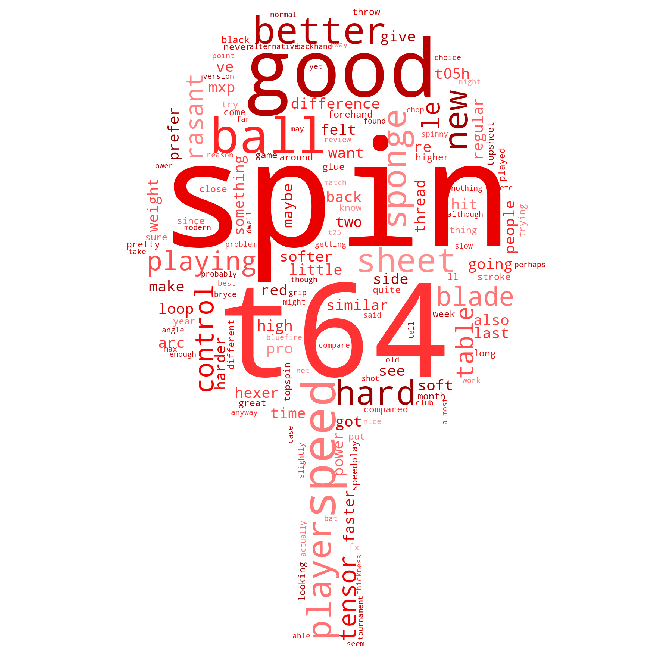

In [145]:
import matplotlib.pyplot as plt
data = string_df1
n_max_words = 300
img_mask = mask

wordcloud = WordCloud(
            background_color='white',
            stopwords=t05_stopwords, #custom_stop,
            max_words=n_max_words,
            max_font_size=120,
            scale=5,
            random_state=1,
            mask=img_mask,
            width=mask.shape[1],
            height=mask.shape[0],
            color_func=similar_color_func_red)
   
wordcloud_red=wordcloud.generate(str(data))

fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')

plt.imshow(wordcloud_red)
plt.show()

In [146]:
baracuda_stopwords = stop_words
baracuda_stopwords.extend(['T05FX','T05','rubber','t05fx','t05',"t05fx'","t05 '",                     
't05','nt','would','much','t05fx','play','get','feel','...','one',
                      'use','tenergy','used','the','tried','using','think','baracuda'])
print(len(baracuda_stopwords))

243


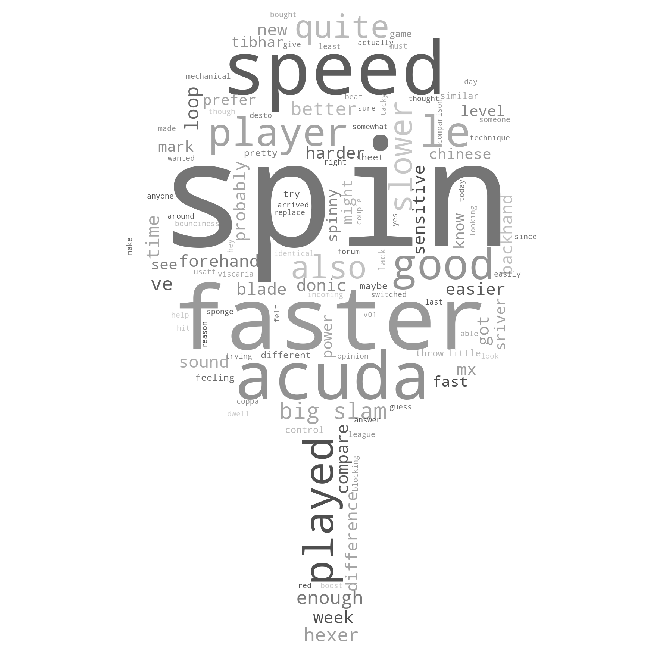

In [147]:
data = string_df2
n_max_words = 300
img_mask = mask

wordcloud = WordCloud(
            background_color='white',
            stopwords=baracuda_stopwords, #custom_stop,
            max_words=n_max_words,
            max_font_size=120,
            scale=5,
            random_state=1,
            mask=img_mask,
            width=mask.shape[1],
            height=mask.shape[0],
            color_func=similar_color_func_black)
   
wordcloud_black=wordcloud.generate(str(data))

fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')

plt.imshow(wordcloud)
plt.show()

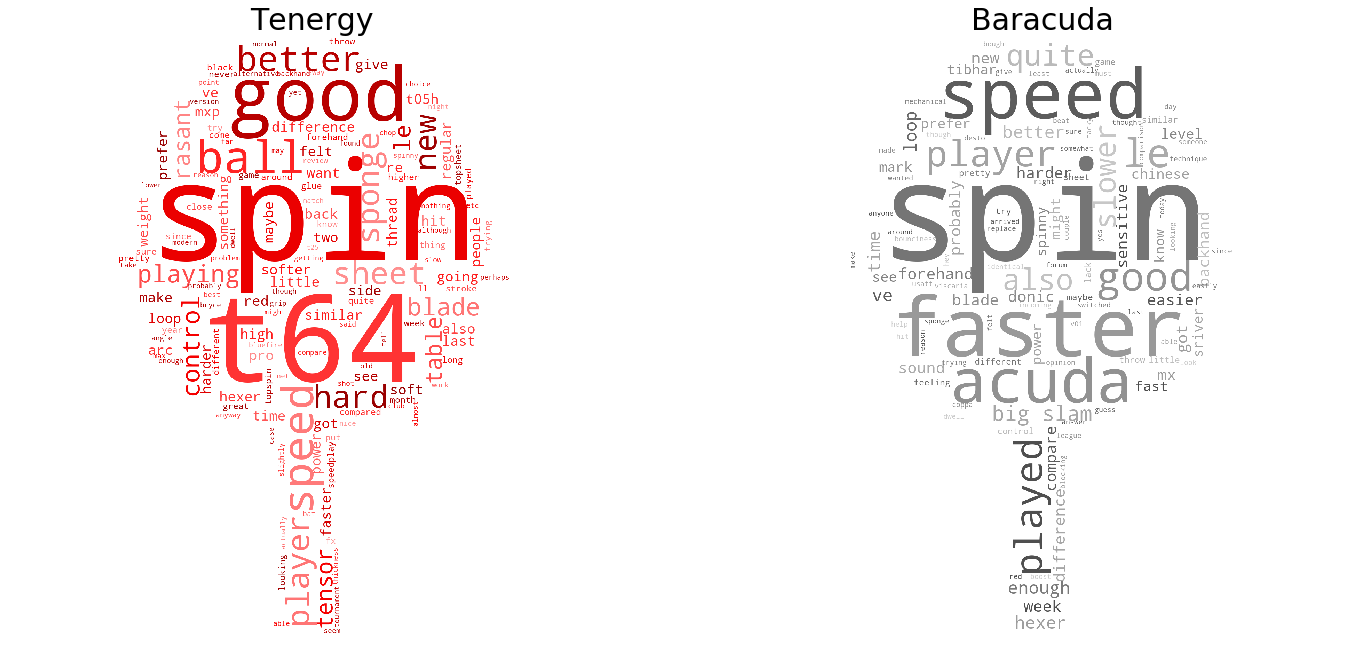

In [159]:
word_clouds = [wordcloud_red,wordcloud_black]
titles = ['Tenergy','Baracuda']
fig = plt.figure(figsize=(24, 12))
for i in range(2):
    ax = fig.add_subplot(1,2,i+1)
    wordcloud = word_clouds[i]
    
    ax.set_title(titles[i],fontsize= 30)
    ax.imshow(wordcloud)
    ax.axis('off')